In [6]:
from PIL import Image
import os
import json
import cv2
import matplotlib.pyplot as plt
from data.image_folder import make_dataset
import numpy as np

In [36]:
def hist_compare1(image1, image2):
    """直方图比较函数1"""
    hist_1 = []
    for i in [0,1,2]:
        hist = cv2.calcHist([image1],[i], None, [256], [0, 256]) 
        hist_1.append(hist)
    hist_2 = []
    for i in [0,1,2]:
        hist = cv2.calcHist([image2],[i], None, [256], [0, 256]) 
        hist_2.append(hist)

    CORREL_retvals = []
    for i in [0,1,2]:
        retval = cv2.compareHist(hist_1[i], hist_2[i], method=cv2.HISTCMP_CORREL)
        CORREL_retvals.append(retval)
    CORREL = np.mean(CORREL_retvals)
    # print("巴氏距离：%s, 相关性：%s, 卡方：%s" %(CORREL, CORREL, CORREL))
    CORREL = CORREL * 0.5 + 0.5
    return CORREL
# 0.70278   0.701095  0.7135
hist_compare1(synthesize_image, style_image) 

0.6889628166804684

In [32]:
def hist_compare2(image1, image2):
    """直方图比较函数1"""
    hist1 = cv2.calcHist([image1], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
    hist2 = cv2.calcHist([image2], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])

    CORREL = cv2.compareHist(hist1, hist2, method=cv2.HISTCMP_CORREL)

    # print("巴氏距离：%s, 相关性：%s, 卡方：%s" %(CORREL, CORREL, CORREL))
    CORREL = CORREL * 0.5 + 0.5
    return CORREL

hist_compare2(synthesize_image, style_image)
# 200： 0.500707 180：0.506255  150：0.5005515

0.4720727188339983

In [38]:
ref_path =  r'label_to_img.json'
image_dir = r'D:\Competition\Jittor\train_resized\imgs'
label_dir = r'D:\Competition\Jittor\val_A_labels_resized'
synthesize_dir = r'D:\Competition\Jittor\submits\results_200'

label_paths = make_dataset(
            label_dir, recursive=False, read_cache=True)
with open(ref_path, 'r') as f:
    ref_dict = json.load(f)

correl_list = []
i = 0
for label_path in label_paths:
    label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)
    # print(label.shape)
    label_name = os.path.basename(label_path)
    
    style_name = ref_dict[label_name]
    style_path = os.path.join(image_dir, style_name)
    style_image = cv2.imread(style_path)
    # print(style_image.shape)

    synthesize_name = label_name.replace(".png",".jpg")
    synthesize_path = os.path.join(synthesize_dir, synthesize_name)
    synthesize_image = cv2.imread(synthesize_path)
    # print(synthesize_image.shape)

    correl = hist_compare1(synthesize_image, style_image)
    correl_list.append(correl)
    i += 1
    # if i == 10:
    #     break
print(np.mean(correl_list))

0.6273688869218969


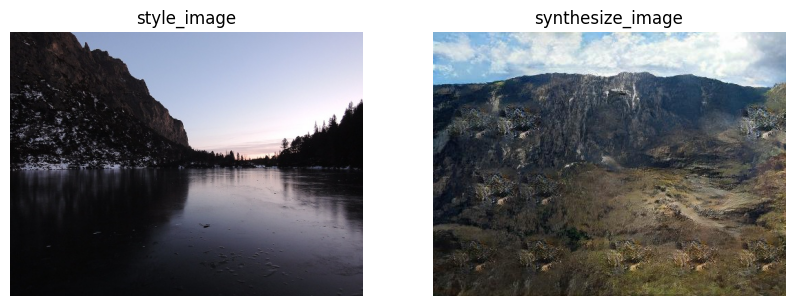

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(style_image,cv2.COLOR_BGR2RGB)) 
plt.title('style_image')
plt.axis('off') 
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(synthesize_image,cv2.COLOR_BGR2RGB)) 
plt.title('synthesize_image')
plt.axis('off') 
plt.show()

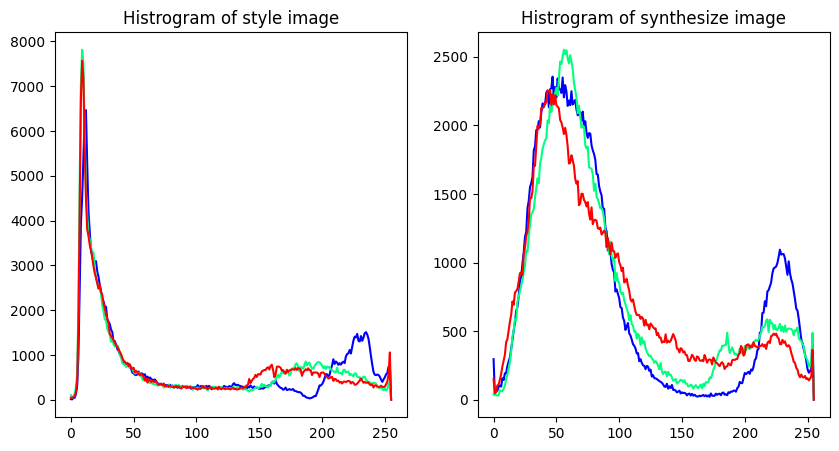

In [19]:
color = ['blue','springgreen','red']  #稍微调整显示颜色，提高可视化效果
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
for i in [0,1,2]:
    style_hist = cv2.calcHist([style_image],[i], None, [256], [0.0, 255.0])   #彩色图有三个通道，通道b:0,g:1,r:2
    plt.plot(hist, color[i])
plt.title('Histrogram of style image')

plt.subplot(1,2,2)   
for i in [0,1,2]:
    hist = cv2.calcHist([synthesize_image],[i], None, [256], [0.0, 255.0])   #彩色图有三个通道，通道b:0,g:1,r:2
    plt.plot(hist, color[i])
plt.title('Histrogram of synthesize image')

plt.show()